<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/7_The_ARMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas yfinance matplotlib numpy

# Data frame

In [ ]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

# Descargar los datos utilizando el método .download()
raw_data = yf.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", start="1994-01-07", end="2023-09-23", interval="1d", group_by='ticker', auto_adjust=True, threads=True)

# Crear una copia de respaldo en caso de que se necesite
df_comp = raw_data.copy()

# Agregar nuevas columnas al conjunto de datos
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

# Eliminar la primera fila si es necesario (ajustar a tus requisitos)
# df_comp = df_comp.iloc[1:]

# Eliminar los tickers originales del conjunto de datos
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']

# Establecer la frecuencia de los datos a días hábiles
df_comp = df_comp.asfreq('B')

# Rellenar valores faltantes hacia adelante
df_comp = df_comp.fillna(method='ffill')
# Restablecer el índice para que "Date" sea una columna
df_comp = df_comp.reset_index()

print(df_comp.head()) # Mostrar las primeras 5 filas para verificar la descarga
print(df_comp.tail()) # Verificar la última fecha en la serie

from google.colab import drive
drive.mount('/content/drive')

# Supongamos que ya tienes un DataFrame llamado 'df_comp' con tus datos

# Especifica el nombre del archivo CSV
nombre_archivo_csv = "Index_2023.csv"  # Reemplaza 'tu_archivo.csv' con el nombre que desees

# Guarda el DataFrame en un archivo CSV en Google Colab
df_comp.to_csv("Index_2023.csv", index=True)

# Mueve el archivo CSV a tu unidad de Google Drive
import shutil
ruta_destino_drive = "/content/drive/My Drive/" + "Index_2023.csv"
shutil.move("Index_2023.csv", ruta_destino_drive)

# Asegúrate de que los datos se hayan guardado en Google Drive
print(f"Los datos se han guardado en Google Drive en {ruta_destino_drive}.")

[*********************100%%**********************]  4 of 4 completed
        Date         spx          dax         ftse        nikkei
                                                                
0 1994-01-07  469.899994  2224.949951  3446.000000  18124.009766
1 1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
2 1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
3 1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
4 1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
           Date          spx           dax         ftse        nikkei
                                                                     
7746 2023-09-18  4453.529785  15727.120117  7652.899902  33533.089844
7747 2023-09-19  4443.950195  15664.480469  7660.200195  33242.589844
7748 2023-09-20  4402.200195  15781.589844  7731.700195  33023.781250
7749 2023-09-21  4330.000000  15571.860352  7678.600098  32571.029297
7750 2023-09-22  4320.060059  15557.290039  7683.899902 

# Package Installation: statsmodels, seaborn, arch

In [ ]:
!pip install statsmodels seaborn arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 14.8 MB/s eta 0:00:00


# Importing the relevant packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

# Importing the Data and Pre-processing

In [ ]:
raw_csv_data = pd.read_csv("/content/drive/My Drive/Index_2023.csv")
df_comp=raw_csv_data.copy()
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')




In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#  The LLR Test

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Creating Returns

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

# ARMA(1,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) here:
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

model_ret_ar_1_ma_1 = ARIMA(df.returns[1:], order=(p, d, q))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9515.141
Date:                Sun, 15 Oct 2023   AIC                          19036.283
Time:                        03:38:45   BIC                          19056.479
Sample:                    01-10-1994   HQIC                         19043.285
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.008     -2.269      0.023      -0.032      -0.002
ma.L1         -1.0000      0.006   -173.258      0.000      -1.011      -0.989
sigma2         1.2600      0.013     93.810      0.000       1.234       1.286
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10136.59
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for AR model and MA model separately:
p_ar = 1  # Autoregressive order
d_ar = 0  # Differencing order for AR model
q_ar = 0  # Moving average order for AR model

p_ma = 0  # Autoregressive order for MA model
d_ma = 0  # Differencing order for MA model
q_ma = 1  # Moving average order for MA model

model_ret_ar_1 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
model_ret_ma_1 = ARIMA(df.returns[1:], order=(p_ma, d_ma, q_ma))


In [ ]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))


ARMA vs AR  1.0

ARMA vs MA  1.0


# Higher-Lag ARMA Models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(3,3):
p = 3  # Autoregressive order
d = 0  # Differencing order (0 for ARMA)
q = 3  # Moving average order

model_ret_ar_3_ma_3 = ARIMA(df.returns[1:], order=(p, d, q))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()


In [ ]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [ ]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -9479.346
Date:                Sun, 15 Oct 2023   AIC                          18974.693
Time:                        03:43:04   BIC                          19028.550
Sample:                    01-10-1994   HQIC                         18993.365
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.497      0.134      -0.006       0.044
ar.L1         -0.1227      0.070     -1.754      0.080      -0.260       0.014
ar.L2         -0.2056      0.056     -3.688      0.000      -0.315      -0.096
ar.L3          0.5076      0.059      8.566      0.000       0.391       0.624
ma.L1          0.1077      0.067      1.617      0.106      -0.023       0.238
ma.L2          0.1440      0.054      2.658      0.008       0.038       0.250
ma.L3         -0.5839      0.055    -10.548      0.000      -0.692      -0.475
sigma2         1.2467      0.012    104.207      0.000       1.223       1.270
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              8994.99
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(3,2):
p_ar = 3  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 2  # Moving average order

model_ret_ar_3_ma_2 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -9483.454
Date:                Sun, 15 Oct 2023   AIC                          18980.909
Time:                        03:43:53   BIC                          19028.034
Sample:                    01-10-1994   HQIC                         18997.247
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.403      0.161      -0.008       0.045
ar.L1         -0.6788      0.067    -10.066      0.000      -0.811      -0.547
ar.L2         -0.3481      0.077     -4.524      0.000      -0.499      -0.197
ar.L3         -0.0963      0.008    -12.790      0.000      -0.111      -0.082
ma.L1          0.6618      0.068      9.668      0.000       0.528       0.796
ma.L2          0.2902      0.077      3.763      0.000       0.139       0.441
sigma2         1.2483      0.012    103.698      0.000       1.225       1.272
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8546.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(2,3):
p_ar = 2  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 3  # Moving average order

model_ret_ar_2_ma_3 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -9482.259
Date:                Sun, 15 Oct 2023   AIC                          18978.517
Time:                        03:44:40   BIC                          19025.642
Sample:                    01-10-1994   HQIC                         18994.856
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.432      0.152      -0.007       0.045
ar.L1         -0.5275      0.071     -7.462      0.000      -0.666      -0.389
ar.L2         -0.0859      0.077     -1.114      0.265      -0.237       0.065
ma.L1          0.5090      0.071      7.213      0.000       0.371       0.647
ma.L2          0.0239      0.076      0.314      0.754      -0.126       0.173
ma.L3         -0.1016      0.007    -13.561      0.000      -0.116      -0.087
sigma2         1.2478      0.012    103.267      0.000       1.224       1.271
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8466.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.016

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(3,1):
p_ar = 3  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 1  # Moving average order

model_ret_ar_3_ma_1 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -9484.555
Date:                Sun, 15 Oct 2023   AIC                          18981.110
Time:                        03:45:51   BIC                          19021.503
Sample:                    01-10-1994   HQIC                         18995.114
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.434      0.152      -0.007       0.045
ar.L1         -0.5104      0.067     -7.571      0.000      -0.643      -0.378
ar.L2         -0.0588      0.008     -7.251      0.000      -0.075      -0.043
ar.L3         -0.0935      0.007    -12.986      0.000      -0.108      -0.079
ma.L1          0.4918      0.069      7.170      0.000       0.357       0.626
sigma2         1.2487      0.012    104.391      0.000       1.225       1.272
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8601.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

0.138

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(2,2):
p_ar = 2  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 2  # Moving average order

model_ret_ar_2_ma_2 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -9495.543
Date:                Sun, 15 Oct 2023   AIC                          19003.086
Time:                        03:46:52   BIC                          19043.479
Sample:                    01-10-1994   HQIC                         19017.090
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.012      1.529      0.126      -0.005       0.043
ar.L1         -0.0593      0.099     -0.599      0.549      -0.254       0.135
ar.L2          0.7443      0.078      9.598      0.000       0.592       0.896
ma.L1          0.0124      0.101      0.124      0.902      -0.185       0.210
ma.L2         -0.7715      0.083     -9.262      0.000      -0.935      -0.608
sigma2         1.2532      0.012    106.981      0.000       1.230       1.276
===================================================================================
Ljung-Box (L1) (Q):                   3.78   Jarque-Bera (JB):              9503.55
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(1,3):
p_ar = 1  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 3  # Moving average order

model_ret_ar_1_ma_3 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -9482.332
Date:                Sun, 15 Oct 2023   AIC                          18976.664
Time:                        03:47:36   BIC                          19017.057
Sample:                    01-10-1994   HQIC                         18990.668
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.452      0.146      -0.007       0.045
ar.L1         -0.4745      0.065     -7.347      0.000      -0.601      -0.348
ma.L1          0.4560      0.065      7.004      0.000       0.328       0.584
ma.L2         -0.0612      0.008     -7.769      0.000      -0.077      -0.046
ma.L3         -0.1008      0.007    -14.056      0.000      -0.115      -0.087
sigma2         1.2479      0.012    104.173      0.000       1.224       1.271
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8490.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -9483.454362159595 	AIC =  18980.90872431919

 ARMA(1,3): 	LL =  -9482.332180770736 	AIC =  18976.664361541472


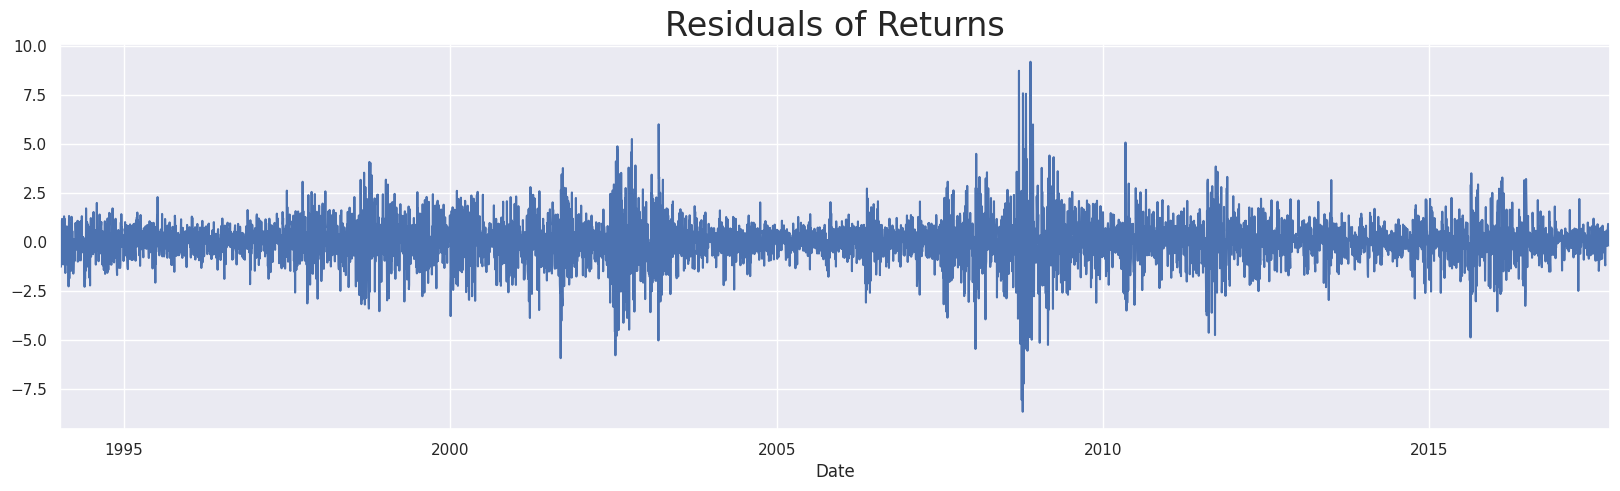

In [ ]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

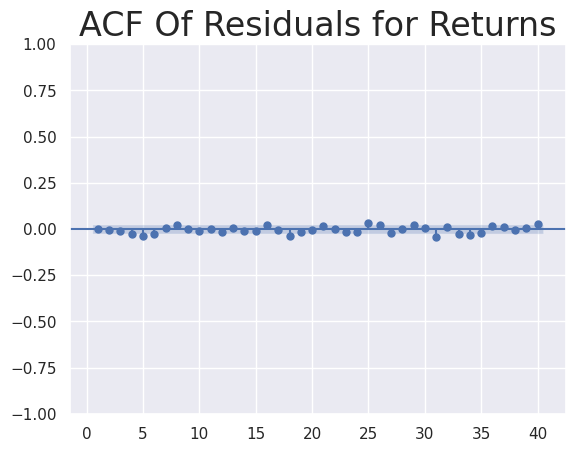

In [ ]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(5,5):
p_ar = 5  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 5  # Moving average order

model_ret_ar_5_ma_5 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -9468.950
Date:                Sun, 15 Oct 2023   AIC                          18961.900
Time:                        03:49:34   BIC                          19042.686
Sample:                    01-10-1994   HQIC                         18989.909
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.012      1.522      0.128      -0.005       0.043
ar.L1         -0.1778      0.126     -1.414      0.157      -0.424       0.069
ar.L2         -0.4072      0.072     -5.633      0.000      -0.549      -0.266
ar.L3         -0.0424      0.063     -0.674      0.501      -0.166       0.081
ar.L4          0.3595      0.064      5.609      0.000       0.234       0.485
ar.L5          0.2668      0.091      2.944      0.003       0.089       0.445
ma.L1          0.1557      0.125      1.245      0.213      -0.089       0.401
ma.L2          0.3551      0.072      4.937      0.000       0.214       0.496
ma.L3         -0.0371      0.061     -0.611      0.541      -0.156       0.082
ma.L4         -0.3530      0.062     -5.690      0.000      -0.475      -0.231
ma.L5         -0.3339      0.086     -3.867      0.000      -0.503      -0.165
sigma2         1.2432      0.012    101.525      0.000       1.219       1.267
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              8495.55
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(5,1):
p_ar = 5  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 1  # Moving average order

model_ret_ar_5_ma_1 = ARIMA(df.returns[1:], order=(p_ar, d_ar, q_ar))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -9474.591
Date:                Sun, 15 Oct 2023   AIC                          18965.183
Time:                        03:50:21   BIC                          19019.040
Sample:                    01-10-1994   HQIC                         18983.855
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.503      0.133      -0.006       0.044
ar.L1          0.3197      0.103      3.107      0.002       0.118       0.521
ar.L2         -0.0457      0.008     -5.566      0.000      -0.062      -0.030
ar.L3         -0.0536      0.009     -5.884      0.000      -0.071      -0.036
ar.L4          0.0515      0.010      4.949      0.000       0.031       0.072
ar.L5         -0.0707      0.007     -9.593      0.000      -0.085      -0.056
ma.L1         -0.3389      0.104     -3.267      0.001      -0.542      -0.136
sigma2         1.2447      0.012    103.899      0.000       1.221       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8547.37
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Fit and print results for ARMA(5,1)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)

# Fit and print results for ARMA(1,5)
model_ret_ar_1_ma_5 = ARIMA(df.returns[1:], order=(1, 0, 5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
print("ARMA(1,5):  \t LL = ", results_ret_ar_1_ma_5.llf, "\t AIC = ", results_ret_ar_1_ma_5.aic)


ARMA(5,1):  	 LL =  -9474.591400046145 	 AIC =  18965.18280009229
ARMA(1,5):  	 LL =  -9475.63324159747 	 AIC =  18967.26648319494


In [ ]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)

ARMA(3,2):  	 LL =  -9483.454362159595 	 AIC =  18980.90872431919


# Residuals for the New Model

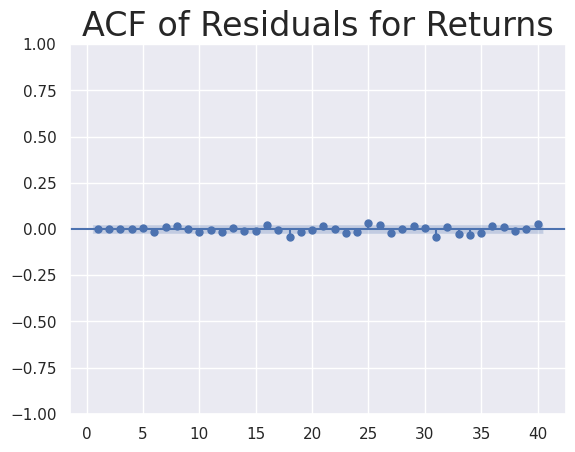

In [ ]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

# ARMA Models for Prices

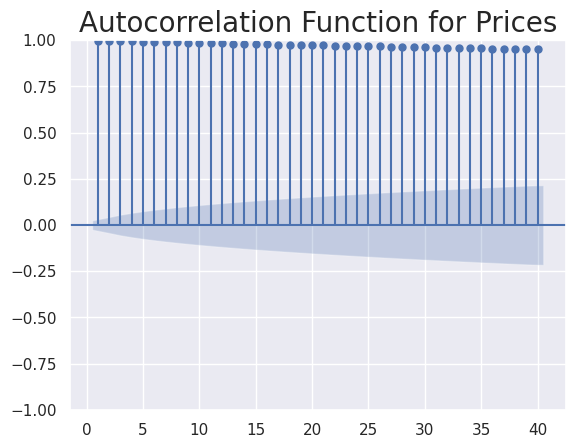

In [ ]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

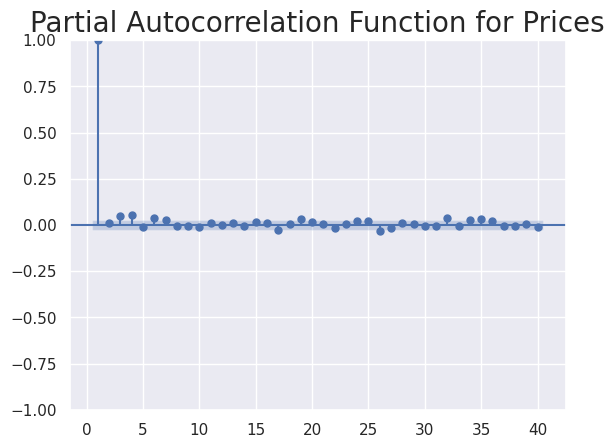

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(1,1):
p_ar = 1  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 1  # Moving average order

model_ar_1_ma_1 = ARIMA(df.market_value, order=(p_ar, d_ar, q_ar))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34040.122
Date:                Sun, 15 Oct 2023   AIC                          68088.244
Time:                        04:08:00   BIC                          68115.173
Sample:                    01-07-1994   HQIC                         68097.580
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.3912    457.582     11.795      0.000    4500.548    6294.235
ar.L1          0.9987      0.001   1403.905      0.000       0.997       1.000
ma.L1         -0.0089      0.009     -1.007      0.314      -0.026       0.008
sigma2      3435.4048     36.944     92.990      0.000    3362.996    3507.813
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3538.42
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

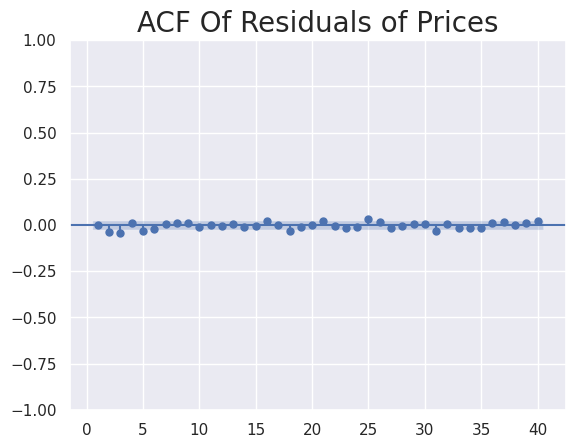

In [ ]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(6,6):
p_ar = 6  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 6  # Moving average order

model_ar_6_ma_6 = ARIMA(df.market_value, order=(p_ar, d_ar, q_ar))

# Specify the starting AR lags (adjust as needed)
start_params = [0] * (p_ar + 1)  # Adjust the length as needed
model_ar_6_ma_6.start_params[:p_ar + 1] = start_params

results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -34017.712
Date:                Sun, 15 Oct 2023   AIC                          68063.423
Time:                        04:12:18   BIC                          68157.676
Sample:                    01-07-1994   HQIC                         68096.100
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.3912   1760.106      3.067      0.002    1947.647    8847.136
ar.L1         -0.6578      0.177     -3.719      0.000      -1.004      -0.311
ar.L2         -0.2802      0.124     -2.257      0.024      -0.523      -0.037
ar.L3          0.0716      0.077      0.932      0.351      -0.079       0.222
ar.L4          0.8688      0.078     11.108      0.000       0.716       1.022
ar.L5          0.7638      0.128      5.946      0.000       0.512       1.016
ar.L6          0.2313      0.154      1.498      0.134      -0.071       0.534
ma.L1          1.6498      0.177      9.319      0.000       1.303       1.997
ma.L2          1.8866      0.263      7.167      0.000       1.371       2.403
ma.L3          1.7515      0.300      5.847      0.000       1.164       2.339
ma.L4          0.8870      0.253      3.510      0.000       0.392       1.382
ma.L5          0.1395      0.152      0.917      0.359      -0.159       0.438
ma.L6         -0.0556      0.010     -5.482      0.000      -0.075      -0.036
sigma2      3419.8867     38.399     89.062      0.000    3344.626    3495.147
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3289.07
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.23
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(5,6):
p_ar = 5  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 6  # Moving average order

model_ar_5_ma_6 = ARIMA(df.market_value, order=(p_ar, d_ar, q_ar))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
results_ar_5_ma_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -34020.550
Date:                Sun, 15 Oct 2023   AIC                          68067.100
Time:                        04:13:47   BIC                          68154.620
Sample:                    01-07-1994   HQIC                         68097.443
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.3912    657.766      8.206      0.000    4108.193    6686.589
ar.L1         -0.9644      0.172     -5.618      0.000      -1.301      -0.628
ar.L2         -0.1712      0.181     -0.947      0.344      -0.526       0.183
ar.L3          0.7349      0.088      8.307      0.000       0.562       0.908
ar.L4          1.0587      0.177      5.982      0.000       0.712       1.406
ar.L5          0.3367      0.147      2.295      0.022       0.049       0.624
ma.L1          1.9474      0.171     11.395      0.000       1.612       2.282
ma.L2          2.0544      0.321      6.396      0.000       1.425       2.684
ma.L3          1.2137      0.296      4.098      0.000       0.633       1.794
ma.L4          0.1251      0.134      0.935      0.350      -0.137       0.387
ma.L5         -0.1608      0.026     -6.081      0.000      -0.213      -0.109
ma.L6         -0.0708      0.012     -5.961      0.000      -0.094      -0.047
sigma2      3412.0655     38.319     89.044      0.000    3336.962    3487.169
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              3271.91
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.26
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specify your order (p, d, q) for ARMA(6,1):
p_ar = 6  # Autoregressive order
d_ar = 0  # Differencing order (0 for ARMA)
q_ar = 1  # Moving average order

model_ar_6_ma_1 = ARIMA(df.market_value, order=(p_ar, d_ar, q_ar))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
results_ar_6_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -34017.777
Date:                Sun, 15 Oct 2023   AIC                          68053.554
Time:                        04:14:49   BIC                          68114.144
Sample:                    01-07-1994   HQIC                         68074.560
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.3956    707.651      7.627      0.000    4010.425    6784.366
ar.L1          1.3546      0.166      8.169      0.000       1.030       1.680
ar.L2         -0.4006      0.163     -2.451      0.014      -0.721      -0.080
ar.L3          0.0069      0.015      0.450      0.653      -0.023       0.037
ar.L4          0.0663      0.014      4.630      0.000       0.038       0.094
ar.L5         -0.0723      0.016     -4.468      0.000      -0.104      -0.041
ar.L6          0.0445      0.008      5.285      0.000       0.028       0.061
ma.L1         -0.3669      0.166     -2.207      0.027      -0.693      -0.041
sigma2      3410.3785     37.674     90.522      0.000    3336.538    3484.219
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3371.53
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.29
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)

ARMA(5,6):  	 LL =  -34020.54997100538 	 AIC =  68067.09994201075
ARMA(6,1):  	 LL =  -34017.77679173855 	 AIC =  68053.5535834771


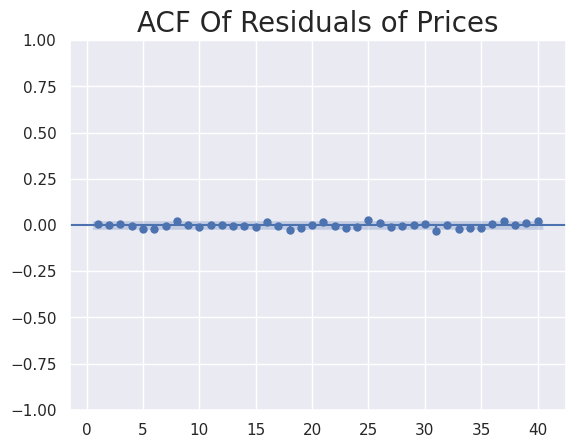

In [ ]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

# ARMA for Returns vs ARMA for Prices

In [ ]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)

ARMA(5,6):  	 LL =  -34020.54997100538 	 AIC =  68067.09994201075
ARMA(5,1):  	 LL =  -9474.591400046145 	 AIC =  18965.18280009229
